In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from IPython.display import display

def eval_symp(fxn,var,vals):
    """function to evaluate symbolic expressions with real numbers (numpy floats or integers)"""
    f = sp.lambdify(var,fxn,"numpy")
    return f(vals)

In [2]:
def make_symbols():
    unicharacters = ["\u03B1",
                        "\u03B2",
                        "\u03B3",
                        "\u03B4",
                        "\u03B5",
                        "\u03B6",
                        "\u03B7",
                        "\u03B8",
                        "\u03B9",
                        "\u03BA",
                        "\u03BB",
                        "\u03BC",
                        "\u03BD",
                        "\u03BE",
                        "\u03BF",
                        "\u03C0",
                        "\u03C1",
                        "\u03C2",
                        "\u03C3",
                        "\u03C4",
                        "\u03C5",
                        "\u03C6",
                        "\u03C7",
                        "\u03C8",
                        "\u03C9",
                        "\u00C5"]
    keys = "alpha,beta,gamma,delta,epsilon,zeta,eta,theta,iota,kappa,lambda,mu,nu,xi,omicron,pi,rho,final_sigma,sigma,tau,upsilon,phi,chi,psi,omega,angstrom"
    return dict(zip(keys.split(","),unicharacters))
symbols = make_symbols()

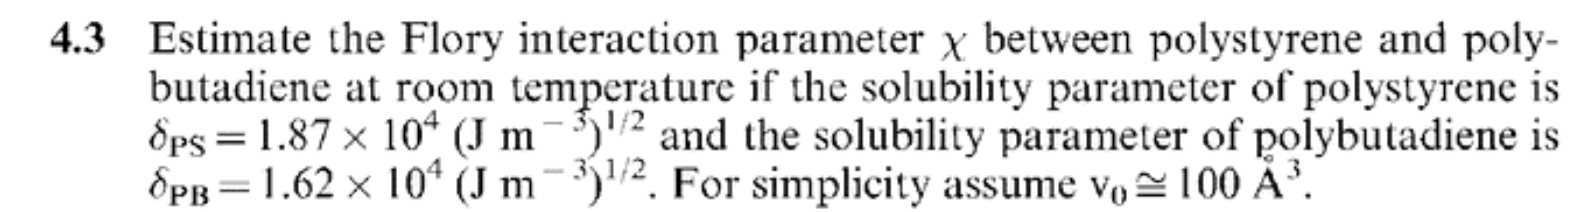

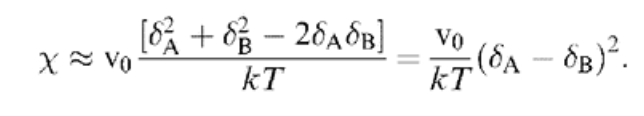

In [3]:
Kb = 1.380649e-23
R = 8.314
T_room = 298
print(f"The chi parameter is ~ {100e-30/(Kb*T_room)*(1.87e4-1.62e4)**2}")

The chi parameter is ~ 0.1519079386753339


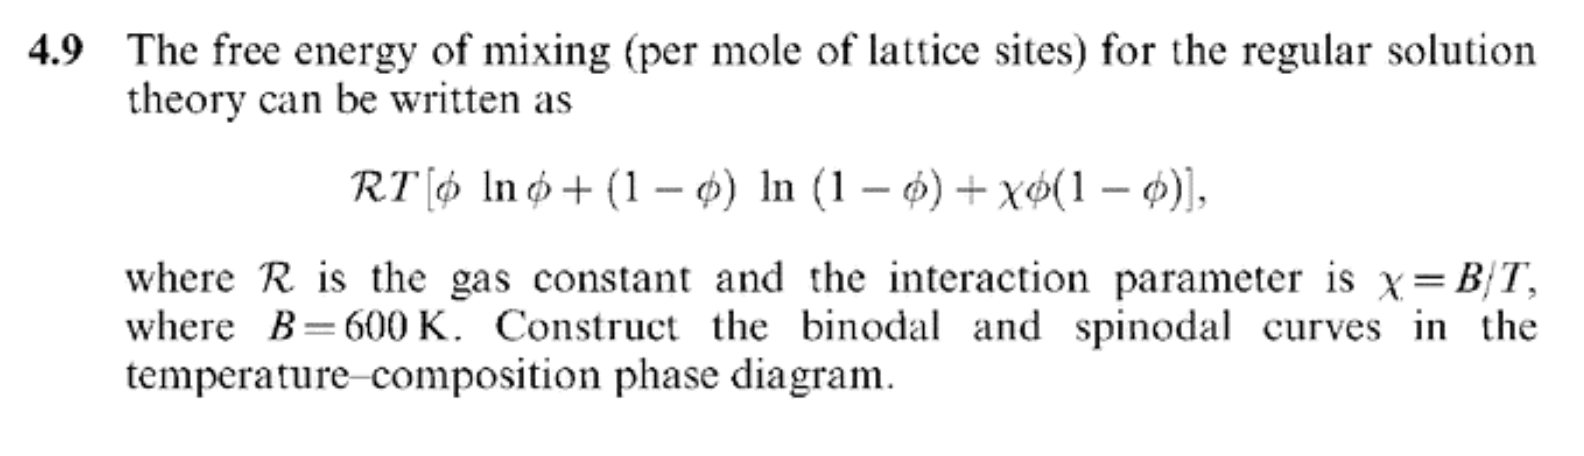

Eq(F, R*T*(B*\phi*(1 - \phi)/T + \phi*log(\phi) + (1 - \phi)*log(1 - \phi)))

Eq(Derivative(F, \phi), R*T*(-B*\phi/T + B*(1 - \phi)/T + log(\phi) - log(1 - \phi)))

Eq(Derivative(F, (\phi, 2)), -R*T*(2*B/T + 1/(\phi - 1) - 1/\phi))

Binodal where T is a function of φ


Eq(T, B*(2*\phi - 1)/(log(\phi) - log(1 - \phi)))

Spinodal where T is a function of φ


Eq(T, 2*B*\phi*(1 - \phi))

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in log
  return 600*(2*Dummy_22 - 1)/(log(Dummy_22) - log(1 - Dummy_22))


Text(0.5, 0, '$\\phi$')

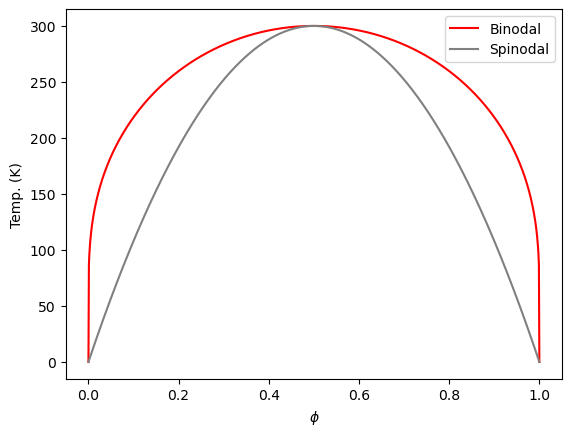

In [4]:
B = sp.Symbol("B", positive = True)
phi = sp.Symbol(r"\phi", positive = True)
T = sp.Symbol("T", positive = True)
R = sp.Symbol("R", positve = True)
F = sp.Symbol("F")
vals = {B:600, R:8.314}

FE = R*T*(phi*sp.ln(phi)+(1-phi)*sp.ln(1-phi)+(B/T)*phi*(1-phi))
display(sp.Eq(F,FE))
dF = FE.diff(phi) #paritial derivative of free energy wrt to phi
binodal = sp.solve(dF,T)[0]
ddF = FE.diff(phi,2)
display(sp.Eq(sp.Derivative(F,phi),dF))
display(sp.Eq(sp.Derivative(F,phi,2),ddF))
spinodal = sp.solve(ddF,T)[0]
print(f'Binodal where T is a function of {symbols["phi"]}')
display(sp.Eq(T,binodal))
print(f'Spinodal where T is a function of {symbols["phi"]}')
display(sp.Eq(T,spinodal))


# #numerical solution for binodal
# TEMPS = np.arange(120,302)
# binodal=np.concatenate([[float(sp.nsolve(dF.subs(vals).subs(T,t), phi, (.001,.499), solver = "anderson"
#                  ,maxsteps=1000, tol = 1e-5,verify = True)) for t in TEMPS],
#                  [float(sp.nsolve(dF.subs(vals).subs(T,t), phi, (.501,.999), solver = "anderson"
#                  ,maxsteps=1000, tol = 1e-5,verify = True)) for t in TEMPS[::-1]]])
# TEMPS_full = np.concatenate([TEMPS,TEMPS[::-1]])
# plt.plot(binodal,TEMPS_full, label = "Binodal")
# plt.plot(binodal,2*600*binodal*(1-binodal), label = "Spinodal")
# ##

phis = np.linspace(0,1,1000)
plt.plot(phis,eval_symp(binodal.subs(vals),phi,phis), label = "Binodal", color = "r")
plt.plot(phis,eval_symp(spinodal.subs(vals),phi,phis), label = "Spinodal", color = "gray")
plt.legend()
plt.ylabel("Temp. (K)")
plt.xlabel(r"$\phi$")

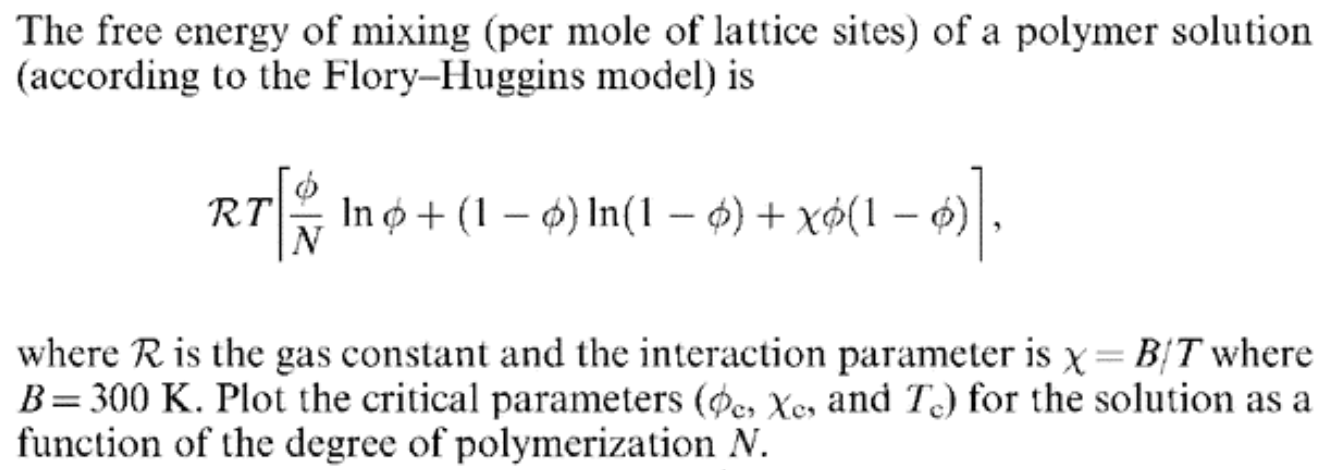

In [5]:
N = sp.Symbol("N", positive = True)
chi = sp.Symbol(r"\chi", positive = True)
chiS = sp.Symbol(r"\chi_{s}", positive = True)
phiC = sp.Symbol(r"\phi_{c}", positive = True)
chiC = sp.Symbol(r"\chi_{c}", positive = True)
Tc = sp.Symbol("T_{c}", positive = True)
FET = R*T*((phi/N)*sp.ln(phi)+(1-phi)*sp.ln(1-phi)+(B/T)*phi*(1-phi))
FEx = R*T*((phi/N)*sp.ln(phi)+(1-phi)*sp.ln(1-phi)+chi*phi*(1-phi))

#take second derivative of of FE wrt phi (in terms of chi)
display(sp.Eq(F,FEx))
ddphi = FEx.diff(phi,2)
display(sp.Eq(sp.Derivative(F,phi,2),ddphi))

chiS_eq1 = sp.factor(sp.simplify(sp.solve(ddphi,chi)[0]))
display(sp.Eq(chiS,chiS_eq1))

dchiS_eq1_dphi = sp.factor(sp.simplify(chiS_eq1.diff(phi)))
display(sp.Eq(sp.Derivative(chiS,phi),dchiS_eq1_dphi))

phi_crit = sp.factor(sp.simplify(sp.solve(dchiS_eq1_dphi,phi)[-1]))
display(sp.Eq(phiC,phi_crit))

chi_crit = sp.factor(sp.simplify(chiS_eq1.subs(phi,phi_crit)))
display(sp.Eq(chiC,chi_crit))

T_crit = sp.simplify(sp.solve(sp.Eq(chiC,chi_crit).subs(chiC, B/Tc),Tc)[0])
display(sp.Eq(Tc,T_crit))

Eq(F, R*T*(\chi*\phi*(1 - \phi) + (1 - \phi)*log(1 - \phi) + \phi*log(\phi)/N))

Eq(Derivative(F, (\phi, 2)), -R*T*(2*\chi + 1/(\phi - 1) - 1/(N*\phi)))

Eq(\chi_{s}, -(N*\phi - \phi + 1)/(2*N*\phi*(\phi - 1)))

Eq(Derivative(\chi_{s}, \phi), (N*\phi**2 - \phi**2 + 2*\phi - 1)/(2*N*\phi**2*(\phi - 1)**2))

Eq(\phi_{c}, (sqrt(N) - 1)/(N - 1))

Eq(\chi_{c}, -sqrt(N)*(N - 1)**2/(2*(-N**(5/2) - N**(3/2) + 2*N**2)))

Eq(T_{c}, 2*B*(-2*N**(3/2) + N**2 + N)/(N - 1)**2)

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in divide
  return (sqrt(N) - 1)/(N - 1)
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in divide
  return -1/2*sqrt(N)*(N - 1)**2/(-N**(5/2) - N**(3/2) + 2*N**2)
<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in divide
  return 600*(-2*N**(3/2) + N**2 + N)/(N - 1)**2


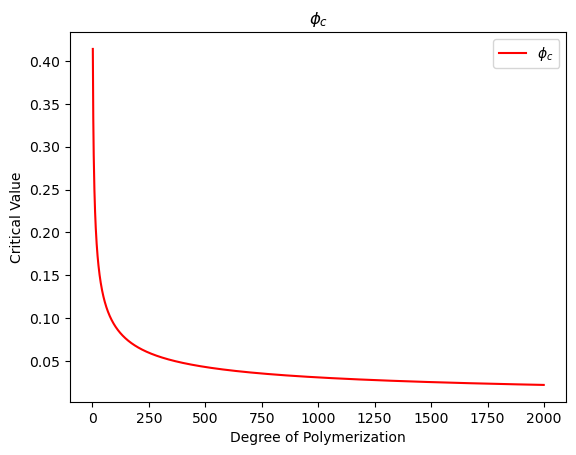

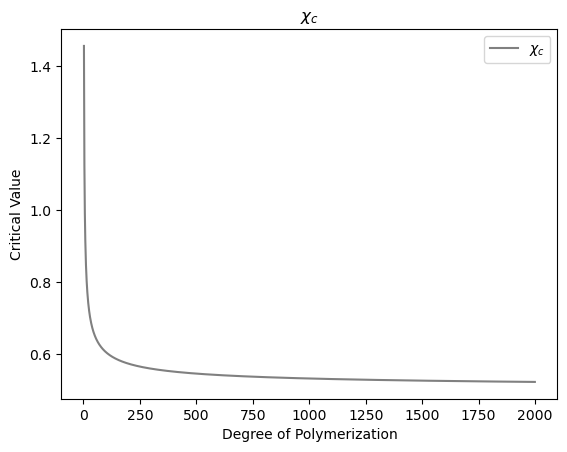

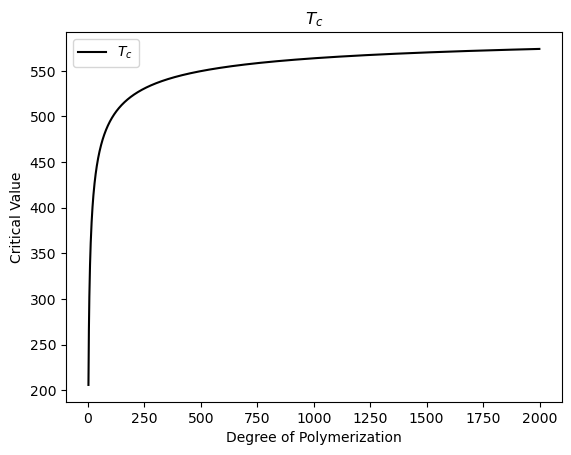

In [6]:
N_vals = np.arange(1,2000)
plt.figure()
plt.plot(N_vals,eval_symp(phi_crit,N,N_vals), label = r"$\phi_{c}$", color = "red")
plt.title(r"$\phi_{c}$")
plt.ylabel("Critical Value")
plt.xlabel("Degree of Polymerization")
plt.legend()
plt.figure()
plt.plot(N_vals,eval_symp(chi_crit,N,N_vals), label = r"$\chi_{c}$", color = "grey")
plt.title(r"$\chi_{c}$")
plt.ylabel("Critical Value")
plt.xlabel("Degree of Polymerization")
plt.legend()
plt.figure()
plt.plot(N_vals,eval_symp(T_crit.subs(B,300),N,N_vals), label = r"$T_{c}$", color = "black")
plt.ylabel("Critical Value")
plt.xlabel("Degree of Polymerization")
plt.title(r"$T_{c}$")
plt.legend()

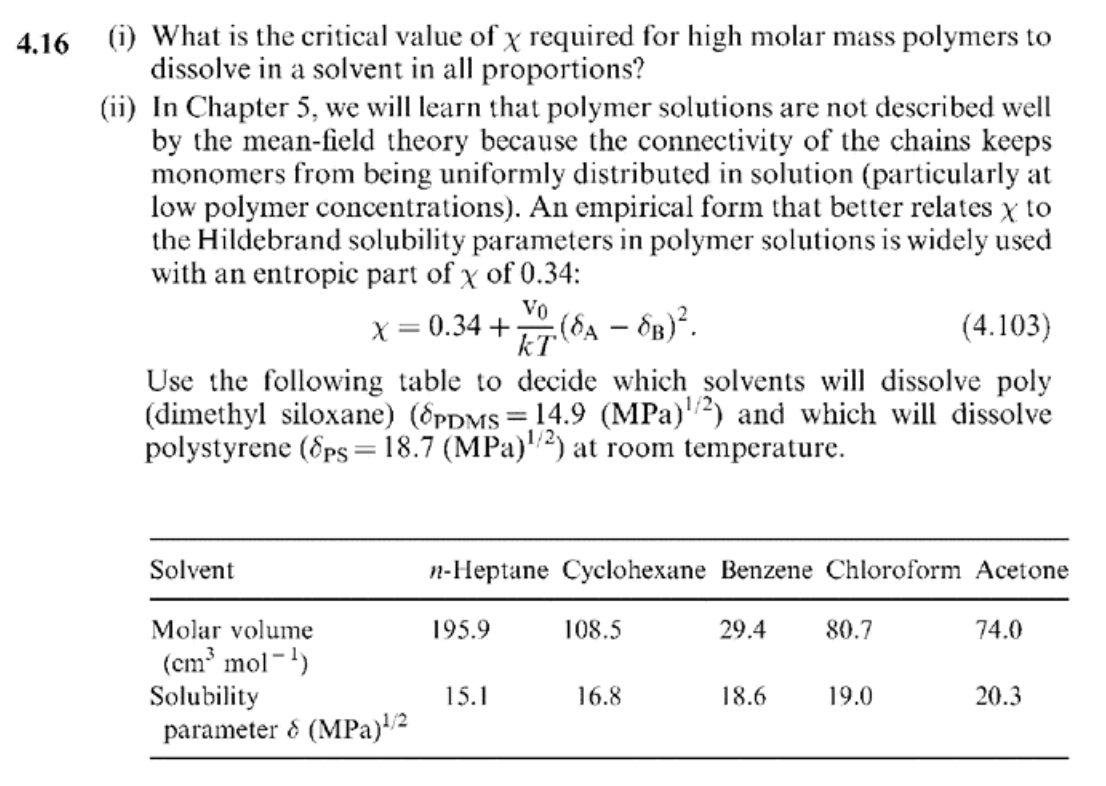

 # 4.16(i) as shown in the plot above, for large N the value of chi converges to 1/2

In [7]:
def chi_416(Sa,Sb,v):
    R = 8.314
    T = 293.15
    return 0.34 + (v/(R*T))*np.power(Sa-Sb,2)

In [8]:
data = np.array([[195.9,108.5,29.4,80.7,74],[15.1,16.8,18.6,19,20.3]])
data[-1,:] = data[-1,:]*1e3
data[0,:] = data[0,:]*1e-6
df = pd.DataFrame(data = data, index = "Molar volume (m^3/mol),Sigma (Pa^1/2)".split(","),columns = 
                 "n-heptane,cyclohexane,benzene,cholorform,acetone".split(","))
display(df)
all_chis = []
for i in range(5):
    chis = []
    for n,j in enumerate([14.9e3,18.7e3]):
        chis.append(chi_416(Sa= data[1,i],Sb = j,v = data[0,i]))
    all_chis.append(chis)
chi_result = np.array(all_chis).T
chi_result_df = pd.DataFrame(data = chi_result,index = "PDMS,PS".split(","), columns = df.columns) 
display(chi_result_df.style.set_caption(" Chi values: solute (index), solvent (columns)"))

,n-heptane,cyclohexane,benzene,cholorform,acetone
Molar volume (m^3/mol),0.000196,0.000108,0.000029,0.000081,0.000074
Sigma (Pa^1/2),15100.000000,16800.000000,18600.000000,19000.000000,20300.000000


,n-heptane,cyclohexane,benzene,cholorform,acetone
PDMS,0.343215,0.500708,0.505139,0.896598,1.225359
PS,1.381692,0.500708,0.340121,0.342980,0.417727


 # PDMS and PS will be soluable in the solvents in which chi is less than .5, however, with numerical error and the co-existance curve being considered, I will interpret that we are looking for chi's in which there is strictly only one phase
 
 # The table below shows the solute-solvent pairs which will result in a  soluable solution via the indices that are not nan  (the estimated chi value remains)

In [9]:
display(chi_result_df.where(chi_result_df<.5).style.set_caption(" Chi values: solute (index), solvent (columns)"))

,n-heptane,cyclohexane,benzene,cholorform,acetone
PDMS,0.343215,nan,nan,nan,nan
PS,nan,nan,0.340121,0.342980,0.417727


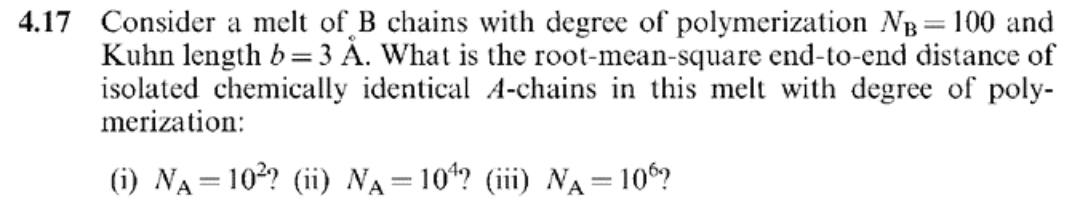

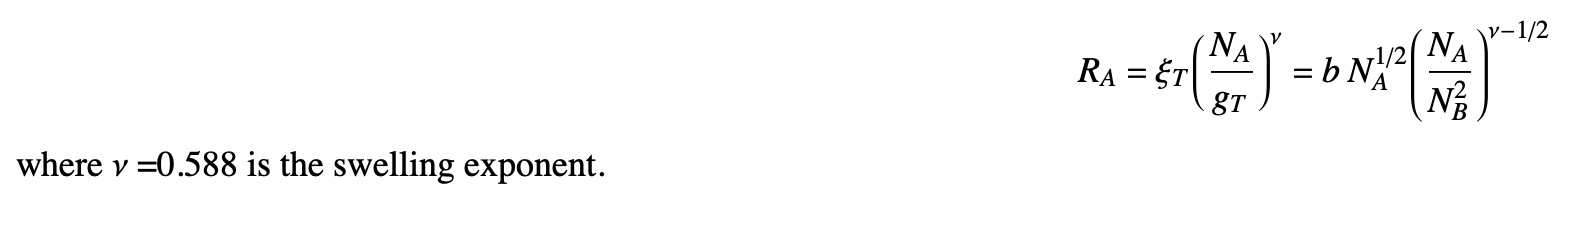

In [10]:
def Ra(Na, b = 3, Nb = 100, v = 0.588):
    return b*np.sqrt(Na)*np.power(Na/np.power(Nb,2),v-.5).round(3)
print("".join([f"For Na = {na}, Ra = {Ra(na)}{symbols['angstrom']}\n" for na in [10**2,10**4,10**6]]))

For Na = 100, Ra = 20.01Å
For Na = 10000, Ra = 300.0Å
For Na = 1000000, Ra = 4500.0Å

